# Wisconsin Breast Cancer Prediction

Dataset obtained from [UCI Machine Learning Datasets](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In [37]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

### Read in data and target labels

In [38]:
data = []
target = []
with open('./breast_cancer.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row[2:])
        target.append(row[1])

In [39]:
data_target_df = pd.DataFrame(data)

data_target_df['label'] = target
data_target_df.label = data_target_df.label.map({
    'M': 0,
    'B': 1,
})

### Some Analysis ...

Before jumping into prediction, lets see what trends of data we are working with.

#### How does the Type of tumour (Malignant or Benign) correlate with the Radius?

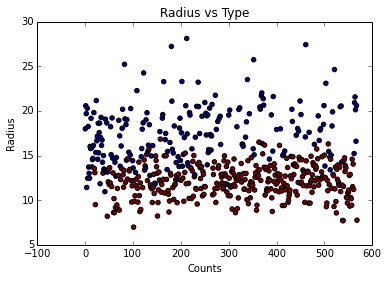

In [40]:
plt.scatter(np.arange(len(data_target_df[0])), data_target_df[0], c=data_target_df.label)
plt.title('Radius vs Type')
plt.xlabel('Counts')
plt.ylabel('Radius')

There is a visible separation of data points in the plot barring a few outliers. As the radius increases, the likelihood of a malignant tumour increases too.

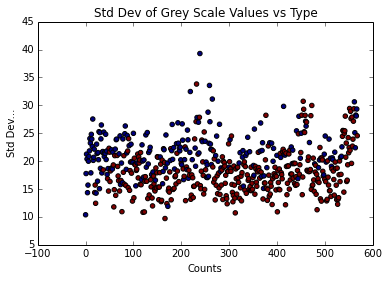

In [41]:
plt.scatter(np.arange(len(data_target_df[1])), data_target_df[1], c=data_target_df.label)
plt.title('Std Dev of Grey Scale Values vs Type')
plt.xlabel('Counts')
plt.ylabel('Std Dev...')

Not too much info here... Move on.

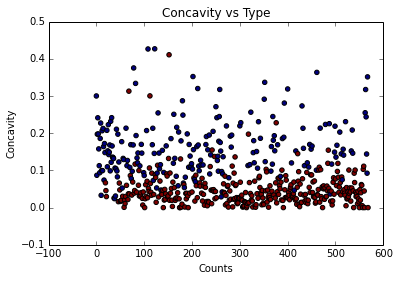

In [42]:
plt.scatter(np.arange(len(data_target_df[6])), data_target_df[6], c=data_target_df.label)
plt.title('Concavity vs Type')
plt.xlabel('Counts')
plt.ylabel('Concavity')

We can again see some separation in this case.

#### What should we use?

There are a couple of options we could use to predict
* [Bernoulli Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Bernoulli_naive_Bayes) - The target labels are binary (0 or 1 ; Benign or Malignant) and since we saw cases where there is no directly apparant separation, this estimate could give us a good prediction.
* [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) - There are cases where there is visible separation between targets in 2-D. Considering all features in a higher dimensional space, there might be {linear/poly/rbf...} separation possible.

In [43]:
# keep all features except the labels for x-training
data_cols = [col for col in data_target_df.columns if col != 'label']
X_train, X_test, y_train, y_test = train_test_split(data_target_df[data_cols], data_target_df.label, random_state=1)

### Bernoulli Naive Bayes

In [44]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
y_pred = bnb.predict(X_test)
accuracy_score(y_pred, y_test)

0.61538461538461542

Not a good enough prediction accuracy score. Let's try SVM.

### Support Vector Machines

In [46]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
y_pred_svm = svc.predict(X_test)
accuracy_score(y_pred_svm, y_test)

0.93706293706293708

In [48]:
confusion_matrix(y_pred_svm, y_test)

array([[50,  4],
       [ 5, 84]])

Looks much better than what Bernoulli N-B gave us.

#### WIP

* Choose certain features that stand out
* Other estimation techniques